# Tugas Hari 3 - Pekan 4 (Python - Data Science)
### Organized by Sanbercode
##### Nama : Fahmi Jabbar (fahmijabbar12@gmail.com)

<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?

**Jawaban:**
1. Data latih => Data yang digunakan untuk melatih model

Data validasi => Data yang digunakan untuk memvalidasi hasil pelatihan model

Data test => Data yang digunakan untuk menguji model (Data yang belum pernah digunakan sebelumnya)

2. Dinilai dari baik buruknya dalam memprediksi model pada data test atau Dengan menggunakan metode cross validation yang di dalamnya terdapat validation fold dan training fold untuk menilai suatu performa suatu model.

3. Confusion matrix adalah pemetaan hasil keputusan model terhadap true positive, true negative, false positive, false negative

5. Classification report dari sklearn memuat semua hasil performa model dalam melakukan klasifikasi mulai dari akurasi,f-score,dll...

---

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
2. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [2]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [5]:
X = df.iloc[:, [0, 1, 2]].values
Y = df.iloc[:, [3]].values #only select survival status
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
# Prediksi data test dengan model yang telah kalian buat!
y_pred = model.predict(X_test)
y_pred

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1])

In [8]:
# Berapa score rata2 dari model dengan teknik cross-validation tersebut?
print("Cross validation = ", cross_val_score(model, X, Y,cv=50).mean())
print("roc_auc_score = ", roc_auc_score(y_test, y_pred))

Cross validation =  0.6438095238095238
roc_auc_score =  0.5473352033660589


In [9]:
# Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
cm = confusion_matrix(y_test, y_pred, labels=[2, 1])
TP = cm[0][0]
FP = cm[0][1]
TN = cm[1][1]
FN = cm[1][0]
cm

array([[ 9, 22],
       [ 9, 37]])

In [10]:
# Bagaimana classification report dari hasil prediksi tersebut?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.80      0.70        46
           2       0.50      0.29      0.37        31

    accuracy                           0.60        77
   macro avg       0.56      0.55      0.54        77
weighted avg       0.58      0.60      0.57        77



In [11]:
print("Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?", TP, "of ", TP+FP)
print("Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?", TN, "of ", TN+FN)

Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive? 9 of  31
Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif? 37 of  46


---

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

**Jawaban:**

1. Bias adalah Error yang disebabkan karena model yang dibuat terlalu sederhana Variance adalah Error yang disebabkan karena model yang dibuat terlalu fit pada data training. Sehingga sangat buruk pada data testing performanya.

2. Overfitting adalah Keadaan dimana model terlalu belajar banyak pada data training secara detail sehingga kemampuan generalisasinya kurang. Underfitting adalah keadaan dimana model tidak belajar banyak pada data training sehingga performanya kurang baik pada data trainingnya sendiri.

3. Kompleksitas model dikembalikan pada data yang diolahnya, bila datanya sederhana. Maka tidak diperlukan kerumitan dalam model begitu pula sebaliknya.

4. Model yang baik adalah error bias dan error variance yang berukuran kecil, sehingga perlu dicari nilai tengah (trade off) dari kedua error tersebut

5. GridSearchCV digunakan ketika kita ingin mencoba seluruh kemungkinan nilai yang ada pada kumpulan data dengan resiko menunggu waktu yang cukup lama sedangkan RandomizedSearchCV digunakan ketika kita hanya ingin mengetahui beberapa nilai saja dari semua kumpulan data dengan waktu yang relatif cepat



---

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik, overtting, atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [12]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [13]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import numpy as np

In [15]:
X = df.iloc[:, [0, 1, 2]].values
Y = df.iloc[:, [3]].values #only select survival status
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
gscv = GridSearchCV(knn, scoring='roc_auc', cv=30, param_grid={'n_neighbors':np.arange(3, 50), 'weights':['distance', 'uniform']}, return_train_score=True)

In [18]:
gscv.fit(X_train, y_train.ravel())

GridSearchCV(cv=30, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [19]:
gscv.best_params_

{'n_neighbors': 45, 'weights': 'uniform'}

In [20]:
gscv.best_score_

0.7258333333333336

In [21]:
y_pred = gscv.predict_proba(X_test)
count = 0
while (count < 10):
  if y_pred[count][0] > y_pred[count][1] :
    print("Pred = 1", "Truth = ", y_test[count].item())
  else :
    print("Pred= 2", "Truth = ", y_test[count].item())
  count += 1

Pred = 1 Truth =  2
Pred = 1 Truth =  1
Pred = 1 Truth =  2
Pred = 1 Truth =  1
Pred = 1 Truth =  2
Pred = 1 Truth =  1
Pred = 1 Truth =  2
Pred = 1 Truth =  2
Pred = 1 Truth =  2
Pred = 1 Truth =  1


In [22]:
y_pred = gscv.predict(X_test)
y_pred2 = gscv.predict(X_train)
roc_auc_score(y_test, y_pred)

0.5213884992987378

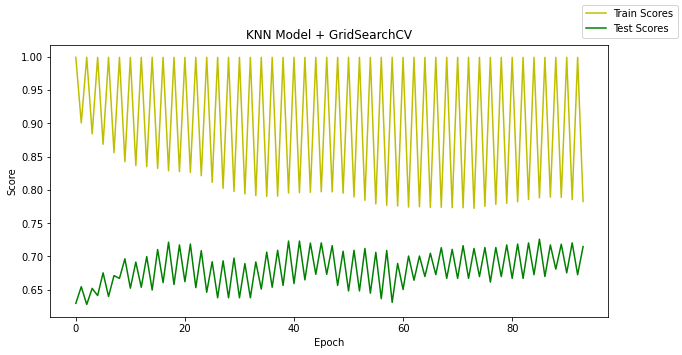

Kesimpulannya model KNN + GSCV masih underfit bila dilihat dari hasil rata-rata score modelnya. 
Argumen saya ini didukung juga dengan buruknya roc_auc_score yang didapatkan oleh model ini pada training set yaitu 0.5288268156424581


In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(0,94), gscv.cv_results_['mean_train_score'], color='y', label='Train Scores')
ax.plot(range(0,94), gscv.cv_results_['mean_test_score'], color='g', label='Test Scores')
ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.set_title("KNN Model + GridSearchCV")
fig.legend()
plt.show()
print("Kesimpulannya model KNN + GSCV masih underfit bila dilihat dari hasil rata-rata score modelnya. \nArgumen saya ini didukung juga dengan buruknya roc_auc_score yang didapatkan oleh model ini pada training set yaitu", roc_auc_score(y_train, y_pred2))

In [24]:
dc = DecisionTreeClassifier()

In [25]:
gscv = GridSearchCV(dc, scoring='roc_auc', cv=20, param_grid={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}, return_train_score=True)

In [26]:
gscv.fit(X_train, y_train.ravel())

GridSearchCV(cv=20, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [27]:
gscv.best_score_

0.6961805555555556

In [28]:
y_pred = gscv.predict_proba(X_test)
count = 0
while (count < 10):
  if y_pred[count][0] > y_pred[count][1] :
    print("Pred = 1", "Truth = ", y_test[count].item())
  else :
    print("Pred= 2", "Truth = ", y_test[count].item())
  count += 1

Pred = 1 Truth =  2
Pred= 2 Truth =  1
Pred = 1 Truth =  2
Pred = 1 Truth =  1
Pred= 2 Truth =  2
Pred= 2 Truth =  1
Pred = 1 Truth =  2
Pred= 2 Truth =  2
Pred= 2 Truth =  2
Pred = 1 Truth =  1


In [29]:
y_pred = gscv.predict(X_test)
y_pred2 = gscv.predict(X_train)
roc_auc_score(y_test, y_pred)

0.5

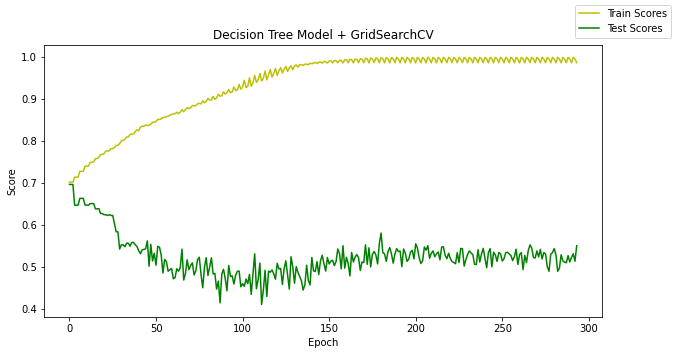

Kesimpulannya model Decision Tree + GSCV masih underfit bila dilihat dari hasil rata-rata score modelnya. 
Argumen saya ini didukung juga dengan buruknya roc_auc_score yang didapatkan oleh model ini pada training set yaitu 0.5


In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(0,294), gscv.cv_results_['mean_train_score'], color='y', label='Train Scores')
ax.plot(range(0,294), gscv.cv_results_['mean_test_score'], color='g', label='Test Scores')
ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.set_title("Decision Tree Model + GridSearchCV")
fig.legend()
plt.show()
print("Kesimpulannya model Decision Tree + GSCV masih underfit bila dilihat dari hasil rata-rata score modelnya. \nArgumen saya ini didukung juga dengan buruknya roc_auc_score yang didapatkan oleh model ini pada training set yaitu", roc_auc_score(y_train, y_pred2))

Bila harus memilih mana yang lebih baik, saya lebih memilih menggunakan KNN + GSCV Karena pada data training, nilai performa model pada training set lebih baik daripada DC + GSCV

Boleh jadi saya masih melakukan metode yang kurang tepat sehingga mempengaruhi hasil yang didapatkan. Mohon bimbingannya agar saya dapat mempelajari ini lebih baik lagi